# Reproducing Results Obtained in Paper:
***Deep Learning and Gradient Boosting for Urban Environmental Noise Monitoring in Smart Cities***

# 1 - Data Acquisition and Format

In [ ]:
# import libraries
import pandas as pd
import requests
from io import StringIO

## 1.1 - Downloading data for Terminal 500

In [ ]:
orig_url='https://drive.google.com/file/d/1l5Jxt-E1qw-MCs9ZrwT9NK9pFvu-xQyb/view'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_500 = pd.read_csv(csv_raw)
print(df_500.head())

       batch_id  calibration*mic  config  ...  serial            timestamp  version
0  180921093345           2006.0  noname  ...       0  1989-01-25 09:11:00        1
1  180921093345              NaN  noname  ...       0  1989-01-25 09:12:00        1
2  180921093345           2006.0  noname  ...  800034  1989-01-25 09:14:00        1
3  180921093345              NaN  noname  ...  800034  1989-01-25 09:15:00        1
4  180921093345              NaN  noname  ...  800034  1989-01-25 09:16:00        1

[5 rows x 102 columns]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1.2 - Downloading data for Terminal 515

In [ ]:
orig_url='https://drive.google.com/file/d/1RcfD5nZe59esG9XfSttuhwkcp99bxac1/view'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_515 = pd.read_csv(csv_raw)
print(df_515.head())

       batch_id  calibration*mic  config  ...  serial            timestamp  version
0  180921114122           2086.0  noname  ...  800035  1989-01-25 11:33:00        1
1  180921114122              NaN  noname  ...  800035  1989-01-25 11:34:00        1
2  180921114122              NaN  noname  ...  800035  1989-01-25 11:35:00        1
3  180921114122           2086.0  noname  ...  800035  1989-01-25 11:35:00        1
4  180921114122              NaN  noname  ...  800035  1989-01-25 11:36:00        1

[5 rows x 102 columns]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1.3 - Downloading data for Terminal 521

In [ ]:
orig_url='https://drive.google.com/file/d/1-l23Hgx9fBwg5-EGPpnu-YCnJZ9hXHkX/view'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df_521 = pd.read_csv(csv_raw)
print(df_521.head())

       batch_id  calibration*mic  config  ...  serial            timestamp  version
0  181003110942           2108.0  noname  ...       0  1989-02-07 11:15:00        1
1  181003110942           2108.0  noname  ...  800044  1989-02-07 12:03:00        1
2  181003110942           2108.0  noname  ...  800044  1989-02-07 12:05:00        1
3  181003121239              NaN  noname  ...  800044  1989-02-07 12:10:00        1
4  181003121239              NaN  noname  ...  800044  1989-02-07 11:09:46        1

[5 rows x 102 columns]


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 1.4 - Prepare Data with Pandas (Terminal 515)

### 1.4.1 - Use noise levels ranging from May 2019 to end of January 2020


In [ ]:
start_date = '2019-05-01 00:00:00'
end_date = '2020-01-31 23:59:59'

In [ ]:
mask = (df_515['measured_time'] >= start_date) & (df_515['measured_time'] <= end_date)
df = df_515.loc[mask]
df

,batch_id,calibration*mic,config,configVer,data*LAeq,data*co2,data*humidity,data*humidityRH,data*no2,dataNoise0,dataNoise1,dataNoise10,dataNoise11,dataNoise12,dataNoise13,dataNoise14,dataNoise15,dataNoise16,dataNoise17,dataNoise18,dataNoise19,dataNoise2,dataNoise20,dataNoise21,dataNoise22,dataNoise23,dataNoise24,dataNoise25,dataNoise26,dataNoise27,dataNoise28,dataNoise29,dataNoise3,dataNoise30,dataNoise31,dataNoise32,dataNoise33,dataNoise34,dataNoise35,dataNoise36,...,dataNoise57,dataNoise58,dataNoise59,dataNoise6,dataNoise60,dataNoise61,dataNoise62,dataNoise63,dataNoise64,dataNoise65,dataNoise66,dataNoise67,dataNoise68,dataNoise69,dataNoise7,dataNoise70,dataNoise71,dataNoise72,dataNoise73,dataNoise74,dataNoise75,dataNoise76,dataNoise8,dataNoise9,data*particles,data*temperature,data*temperatureTC,location,measured_time,meta*no2*gaz,meta*no2*lifetime,meta*no2*serial,meta*noise*gain,meta*noise*offset,meta*noise*sensibility,meter_code,park_code,serial,timestamp,version
15814,190501001529,NaN,SOLIHULL_20181003,181003150447,6203,NaN,37956,66.395325,12,0,0,0,0,0,0,0,4,102,67,43,49,0,48,46,33,30,19,26,26,28,26,26,0,22,33,29,9,31,25,20,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11667,21912,11.902085,"52.413168,-1.827236",2019-05-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,515,220,121,1989-09-10 00:00:00,1
15815,190501003028,NaN,SOLIHULL_20181003,181003150447,6185,NaN,38400,67.242188,13,0,0,0,0,0,16,54,34,55,38,35,31,0,32,30,30,28,28,19,23,32,23,29,0,26,16,27,28,26,24,28,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8250,21872,11.794834,"52.413168,-1.827236",2019-05-01 00:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,515,220,121,1989-09-10 00:15:00,1
15816,190501004528,NaN,SOLIHULL_20181003,181003150447,6019,NaN,38524,67.478699,12,0,0,0,40,150,40,71,37,34,33,26,28,0,23,22,17,18,14,19,17,36,23,18,0,22,16,20,25,12,16,14,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7446,21832,11.687583,"52.413168,-1.827236",2019-05-01 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,515,220,121,1989-09-10 00:30:00,1
15817,190501010028,NaN,SOLIHULL_20181003,181003150447,5967,NaN,38508,67.448181,11,0,0,0,0,9,28,49,49,49,46,68,37,0,36,38,32,27,29,21,23,25,22,25,0,14,26,22,28,23,28,31,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6627,21800,11.601782,"52.413168,-1.827236",2019-05-01 00:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,515,220,121,1989-09-10 00:45:00,1
15818,190501011529,NaN,SOLIHULL_20181003,181003150447,5986,NaN,38700,67.814392,11,0,0,0,3,19,59,47,45,36,27,32,38,0,30,34,24,30,25,29,26,23,25,31,0,44,25,24,32,22,27,22,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9927,21740,11.440906,"52.413168,-1.827236",2019-05-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,515,220,121,1989-09-10 01:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42091,200129160031,NaN,SOLIHULL_20181003,181003150447,6729,NaN,39832,69.973511,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,21,37,74,52,62,41,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12090,21044,9.574739,"52.413168,-1.827236",2020-01-29 15:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,515,220,121,1990-06-13 15:45:00,1
42092,200129161531,NaN,SOLIHULL_20181003,181003150447,6673,NaN,39856,70.019287,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,24,35,78,73,36,25,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12000,20980,9.403137,"52.413168,-1.827236",2020-01-29 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,515,220,121,1990-06-13 16:00:00,1
42093,200129164530,NaN,SOLIHULL_20181003,181003150447,6740,NaN,39948,70.194763,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0,12,14,12,39,46,37,44,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14250,20888,9.156460,"52.413168,-1.827236",2020-01-29 16:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN

### 1.4.2 - Extract date and hour from datetime


In [ ]:
df.measured_time = pd.to_datetime(df.measured_time)
df['date'] = df.measured_time.dt.date
df['hour'] = df.measured_time.dt.hour
df

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,batch_id,calibration*mic,config,configVer,data*LAeq,data*co2,data*humidity,data*humidityRH,data*no2,dataNoise0,dataNoise1,dataNoise10,dataNoise11,dataNoise12,dataNoise13,dataNoise14,dataNoise15,dataNoise16,dataNoise17,dataNoise18,dataNoise19,dataNoise2,dataNoise20,dataNoise21,dataNoise22,dataNoise23,dataNoise24,dataNoise25,dataNoise26,dataNoise27,dataNoise28,dataNoise29,dataNoise3,dataNoise30,dataNoise31,dataNoise32,dataNoise33,dataNoise34,dataNoise35,dataNoise36,...,dataNoise59,dataNoise6,dataNoise60,dataNoise61,dataNoise62,dataNoise63,dataNoise64,dataNoise65,dataNoise66,dataNoise67,dataNoise68,dataNoise69,dataNoise7,dataNoise70,dataNoise71,dataNoise72,dataNoise73,dataNoise74,dataNoise75,dataNoise76,dataNoise8,dataNoise9,data*particles,data*temperature,data*temperatureTC,location,measured_time,meta*no2*gaz,meta*no2*lifetime,meta*no2*serial,meta*noise*gain,meta*noise*offset,meta*noise*sensibility,meter_code,park_code,serial,timestamp,version,date,hour
15814,190501001529,NaN,SOLIHULL_20181003,181003150447,6203,NaN,37956,66.395325,12,0,0,0,0,0,0,0,4,102,67,43,49,0,48,46,33,30,19,26,26,28,26,26,0,22,33,29,9,31,25,20,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11667,21912,11.902085,"52.413168,-1.827236",2019-05-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,515,220,121,1989-09-10 00:00:00,1,2019-05-01,0
15815,190501003028,NaN,SOLIHULL_20181003,181003150447,6185,NaN,38400,67.242188,13,0,0,0,0,0,16,54,34,55,38,35,31,0,32,30,30,28,28,19,23,32,23,29,0,26,16,27,28,26,24,28,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8250,21872,11.794834,"52.413168,-1.827236",2019-05-01 00:15:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,515,220,121,1989-09-10 00:15:00,1,2019-05-01,0
15816,190501004528,NaN,SOLIHULL_20181003,181003150447,6019,NaN,38524,67.478699,12,0,0,0,40,150,40,71,37,34,33,26,28,0,23,22,17,18,14,19,17,36,23,18,0,22,16,20,25,12,16,14,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7446,21832,11.687583,"52.413168,-1.827236",2019-05-01 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,515,220,121,1989-09-10 00:30:00,1,2019-05-01,0
15817,190501010028,NaN,SOLIHULL_20181003,181003150447,5967,NaN,38508,67.448181,11,0,0,0,0,9,28,49,49,49,46,68,37,0,36,38,32,27,29,21,23,25,22,25,0,14,26,22,28,23,28,31,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6627,21800,11.601782,"52.413168,-1.827236",2019-05-01 00:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,515,220,121,1989-09-10 00:45:00,1,2019-05-01,0
15818,190501011529,NaN,SOLIHULL_20181003,181003150447,5986,NaN,38700,67.814392,11,0,0,0,3,19,59,47,45,36,27,32,38,0,30,34,24,30,25,29,26,23,25,31,0,44,25,24,32,22,27,22,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9927,21740,11.440906,"52.413168,-1.827236",2019-05-01 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,515,220,121,1989-09-10 01:00:00,1,2019-05-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42091,200129160031,NaN,SOLIHULL_20181003,181003150447,6729,NaN,39832,69.973511,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,21,37,74,52,62,41,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12090,21044,9.574739,"52.413168,-1.827236",2020-01-29 15:45:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,515,220,121,1990-06-13 15:45:00,1,2020-01-29,15
42092,200129161531,NaN,SOLIHULL_20181003,181003150447,6673,NaN,39856,70.019287,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,24,35,78,73,36,25,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12000,20980,9.403137,"52.413168,-1.827236",2020-01-29 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,515,220,121,1990-06-13 16:00:00,1,2020-01-29,16
42093,200129164530,NaN,SOLIHULL_20181003,181003150447,6740,NaN,39948,70.194763,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0,12,14,12,39,46,37,44,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14250,20888,9.156460,"52.413168,-1.827236",20

### 1.4.3 - Group by date and hour

In [ ]:
df1 = df.groupby(['date','hour'], as_index=False).sum()
df1

,date,hour,batch_id,calibration*mic,data*LAeq,data*co2,data*humidity,data*humidityRH,data*no2,dataNoise0,dataNoise1,dataNoise10,dataNoise11,dataNoise12,dataNoise13,dataNoise14,dataNoise15,dataNoise16,dataNoise17,dataNoise18,dataNoise19,dataNoise2,dataNoise20,dataNoise21,dataNoise22,dataNoise23,dataNoise24,dataNoise25,dataNoise26,dataNoise27,dataNoise28,dataNoise29,dataNoise3,dataNoise30,dataNoise31,dataNoise32,dataNoise33,dataNoise34,dataNoise35,dataNoise36,...,dataNoise53,dataNoise54,dataNoise55,dataNoise56,dataNoise57,dataNoise58,dataNoise59,dataNoise6,dataNoise60,dataNoise61,dataNoise62,dataNoise63,dataNoise64,dataNoise65,dataNoise66,dataNoise67,dataNoise68,dataNoise69,dataNoise7,dataNoise70,dataNoise71,dataNoise72,dataNoise73,dataNoise74,dataNoise75,dataNoise76,dataNoise8,dataNoise9,data*particles,data*temperature,data*temperatureTC,meta*no2*lifetime,meta*no2*serial,meta*noise*gain,meta*noise*offset,meta*noise*sensibility,meter_code,park_code,serial,version
0,2019-05-01,0,762004019113,0.0,24374,0.0,153388,268.564392,48,0,0,0,40,159,84,174,124,240,184,172,145,0,139,136,112,103,90,85,89,121,94,98,0,84,91,98,90,92,93,93,...,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33990,87416,46.986284,0.0,0.0,0.0,0.0,0.0,2060,880,484,4
1,2019-05-01,1,762004060618,0.0,23857,0.0,155924,273.401428,42,0,0,0,43,184,241,337,252,160,123,133,128,0,109,117,95,111,97,73,74,85,94,90,0,96,95,90,93,86,93,73,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41178,86792,45.313169,0.0,0.0,0.0,0.0,0.0,2060,880,484,4
2,2019-05-01,2,762004099116,0.0,23675,0.0,160212,281.580139,41,0,0,0,28,329,341,284,288,171,145,96,135,0,78,76,94,91,86,96,75,84,94,79,0,86,91,82,93,74,69,54,...,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42018,86156,43.607878,0.0,0.0,0.0,0.0,0.0,2060,880,484,4
3,2019-05-01,3,762004139234,0.0,25354,0.0,168536,297.456909,37,0,0,0,29,115,142,260,244,232,155,123,118,0,98,90,75,85,84,104,78,75,78,102,0,110,91,93,100,96,97,81,...,12,6,1,3,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60240,85204,41.055305,0.0,0.0,0.0,0.0,0.0,2060,880,484,4
4,2019-05-01,4,762004179116,0.0,27527,0.0,180440,320.161987,32,0,0,0,0,0,0,0,0,3,7,22,17,0,31,31,32,33,42,52,63,72,83,93,0,105,117,118,140,149,144,145,...,24,16,13,8,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81231,84724,39.768293,0.0,0.0,0.0,0.0,0.0,2060,880,484,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6564,2020-01-29,12,800516499189,0.0,27144,0.0,153356,268.503357,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,20,0,35,66,102,169,240,221,178,...,3,5,0,0,0,2,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,48102,84288,38.599258,0.0,0.0,0.0,0.0,0.0,2060,880,484,4
6565,2020-01-29,13,800516539127,1950.0,27101,0.0,156984,275.423218,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,10,30,0,51,116,145,161,215,200,181,...,4,0,0,1,1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49965,84452,39.038987,0.0,4067.0,110.0,2.0,1950.0,2060,880,484,4
6566,2020-01-29,14,800516579125,0.0,27603,0.0,158568,278.444458,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,27,47,75,138,157,171,221,...,8,3,5,4,4,2,3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,52179,84016,37.869951,0.0,0.0,0.0,0.0,0.0,2060,880,484,4
6567,2020-01-29,15,800516619123,0.0,27257,0.0,159772,280.740906,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,0,29,73,133,182,172,184,169,...,3,1,2,3,2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57300,84232,38.449106,0.0,0.0,0.0,0.0,0.0,2060,880,484,4


### 1.4.4 - Merge date and hour into one additional column and ensure datetime type

In [ ]:
# Necessary because we lose the measured_time column when we group and sum
df1['date'] = pd.to_datetime(df1.date, cache=True) 
df1['hour'] = pd.to_timedelta(df1.hour, unit='h')
df1['datetime'] = df1['date'] + df1['hour']
df1

,date,hour,batch_id,calibration*mic,data*LAeq,data*co2,data*humidity,data*humidityRH,data*no2,dataNoise0,dataNoise1,dataNoise10,dataNoise11,dataNoise12,dataNoise13,dataNoise14,dataNoise15,dataNoise16,dataNoise17,dataNoise18,dataNoise19,dataNoise2,dataNoise20,dataNoise21,dataNoise22,dataNoise23,dataNoise24,dataNoise25,dataNoise26,dataNoise27,dataNoise28,dataNoise29,dataNoise3,dataNoise30,dataNoise31,dataNoise32,dataNoise33,dataNoise34,dataNoise35,dataNoise36,...,dataNoise54,dataNoise55,dataNoise56,dataNoise57,dataNoise58,dataNoise59,dataNoise6,dataNoise60,dataNoise61,dataNoise62,dataNoise63,dataNoise64,dataNoise65,dataNoise66,dataNoise67,dataNoise68,dataNoise69,dataNoise7,dataNoise70,dataNoise71,dataNoise72,dataNoise73,dataNoise74,dataNoise75,dataNoise76,dataNoise8,dataNoise9,data*particles,data*temperature,data*temperatureTC,meta*no2*lifetime,meta*no2*serial,meta*noise*gain,meta*noise*offset,meta*noise*sensibility,meter_code,park_code,serial,version,datetime
0,2019-05-01,0 days 00:00:00,762004019113,0.0,24374,0.0,153388,268.564392,48,0,0,0,40,159,84,174,124,240,184,172,145,0,139,136,112,103,90,85,89,121,94,98,0,84,91,98,90,92,93,93,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33990,87416,46.986284,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,2019-05-01 00:00:00
1,2019-05-01,0 days 01:00:00,762004060618,0.0,23857,0.0,155924,273.401428,42,0,0,0,43,184,241,337,252,160,123,133,128,0,109,117,95,111,97,73,74,85,94,90,0,96,95,90,93,86,93,73,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41178,86792,45.313169,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,2019-05-01 01:00:00
2,2019-05-01,0 days 02:00:00,762004099116,0.0,23675,0.0,160212,281.580139,41,0,0,0,28,329,341,284,288,171,145,96,135,0,78,76,94,91,86,96,75,84,94,79,0,86,91,82,93,74,69,54,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42018,86156,43.607878,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,2019-05-01 02:00:00
3,2019-05-01,0 days 03:00:00,762004139234,0.0,25354,0.0,168536,297.456909,37,0,0,0,29,115,142,260,244,232,155,123,118,0,98,90,75,85,84,104,78,75,78,102,0,110,91,93,100,96,97,81,...,6,1,3,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60240,85204,41.055305,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,2019-05-01 03:00:00
4,2019-05-01,0 days 04:00:00,762004179116,0.0,27527,0.0,180440,320.161987,32,0,0,0,0,0,0,0,0,3,7,22,17,0,31,31,32,33,42,52,63,72,83,93,0,105,117,118,140,149,144,145,...,16,13,8,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81231,84724,39.768293,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,2019-05-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6564,2020-01-29,0 days 12:00:00,800516499189,0.0,27144,0.0,153356,268.503357,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,20,0,35,66,102,169,240,221,178,...,5,0,0,0,2,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,48102,84288,38.599258,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,2020-01-29 12:00:00
6565,2020-01-29,0 days 13:00:00,800516539127,1950.0,27101,0.0,156984,275.423218,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,10,30,0,51,116,145,161,215,200,181,...,0,0,1,1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49965,84452,39.038987,0.0,4067.0,110.0,2.0,1950.0,2060,880,484,4,2020-01-29 13:00:00
6566,2020-01-29,0 days 14:00:00,800516579125,0.0,27603,0.0,158568,278.444458,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,27,47,75,138,157,171,221,...,3,5,4,4,2,3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,52179,84016,37.869951,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,2020-01-29 14:00:00
6567,2020-01-29,0 days 15:00:00,800516619123,0.0,27257,0.0,159772,280.740906,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,0,29,73,133,182,172,184,169,...,1,2,3,2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57300,84232,38.449106,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,202

### 1.4.5 - Calculating Average Noise Value per Hour

In [ ]:
'''
This function calculates the Average Noise Value per hour
Returns a series
'''
def calculateAverageNoise(row):
  numerator = 0
  denominator = 0
  for i in range(77):
    name = 'dataNoise'+str(i)
    numerator += (i+35) * row[name] 
    denominator += row[name]
  avgNoise = numerator / denominator
  return pd.Series({'average_noise':avgNoise})

In [ ]:
# Join average_noise series to dataframe
df2 = df1.join(df1.apply(calculateAverageNoise, axis=1))
df2

,date,hour,batch_id,calibration*mic,data*LAeq,data*co2,data*humidity,data*humidityRH,data*no2,dataNoise0,dataNoise1,dataNoise10,dataNoise11,dataNoise12,dataNoise13,dataNoise14,dataNoise15,dataNoise16,dataNoise17,dataNoise18,dataNoise19,dataNoise2,dataNoise20,dataNoise21,dataNoise22,dataNoise23,dataNoise24,dataNoise25,dataNoise26,dataNoise27,dataNoise28,dataNoise29,dataNoise3,dataNoise30,dataNoise31,dataNoise32,dataNoise33,dataNoise34,dataNoise35,dataNoise36,...,dataNoise55,dataNoise56,dataNoise57,dataNoise58,dataNoise59,dataNoise6,dataNoise60,dataNoise61,dataNoise62,dataNoise63,dataNoise64,dataNoise65,dataNoise66,dataNoise67,dataNoise68,dataNoise69,dataNoise7,dataNoise70,dataNoise71,dataNoise72,dataNoise73,dataNoise74,dataNoise75,dataNoise76,dataNoise8,dataNoise9,data*particles,data*temperature,data*temperatureTC,meta*no2*lifetime,meta*no2*serial,meta*noise*gain,meta*noise*offset,meta*noise*sensibility,meter_code,park_code,serial,version,datetime,average_noise
0,2019-05-01,0 days 00:00:00,762004019113,0.0,24374,0.0,153388,268.564392,48,0,0,0,40,159,84,174,124,240,184,172,145,0,139,136,112,103,90,85,89,121,94,98,0,84,91,98,90,92,93,93,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33990,87416,46.986284,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,2019-05-01 00:00:00,60.181894
1,2019-05-01,0 days 01:00:00,762004060618,0.0,23857,0.0,155924,273.401428,42,0,0,0,43,184,241,337,252,160,123,133,128,0,109,117,95,111,97,73,74,85,94,90,0,96,95,90,93,86,93,73,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41178,86792,45.313169,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,2019-05-01 01:00:00,58.492338
2,2019-05-01,0 days 02:00:00,762004099116,0.0,23675,0.0,160212,281.580139,41,0,0,0,28,329,341,284,288,171,145,96,135,0,78,76,94,91,86,96,75,84,94,79,0,86,91,82,93,74,69,54,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42018,86156,43.607878,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,2019-05-01 02:00:00,57.451532
3,2019-05-01,0 days 03:00:00,762004139234,0.0,25354,0.0,168536,297.456909,37,0,0,0,29,115,142,260,244,232,155,123,118,0,98,90,75,85,84,104,78,75,78,102,0,110,91,93,100,96,97,81,...,1,3,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60240,85204,41.055305,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,2019-05-01 03:00:00,60.519086
4,2019-05-01,0 days 04:00:00,762004179116,0.0,27527,0.0,180440,320.161987,32,0,0,0,0,0,0,0,0,3,7,22,17,0,31,31,32,33,42,52,63,72,83,93,0,105,117,118,140,149,144,145,...,13,8,1,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81231,84724,39.768293,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,2019-05-01 04:00:00,72.746518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6564,2020-01-29,0 days 12:00:00,800516499189,0.0,27144,0.0,153356,268.503357,57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,20,0,35,66,102,169,240,221,178,...,0,0,0,2,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,48102,84288,38.599258,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,2020-01-29 12:00:00,74.726462
6565,2020-01-29,0 days 13:00:00,800516539127,1950.0,27101,0.0,156984,275.423218,58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,10,30,0,51,116,145,161,215,200,181,...,0,1,1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49965,84452,39.038987,0.0,4067.0,110.0,2.0,1950.0,2060,880,484,4,2020-01-29 13:00:00,74.601003
6566,2020-01-29,0 days 14:00:00,800516579125,0.0,27603,0.0,158568,278.444458,51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,27,47,75,138,157,171,221,...,5,4,4,2,3,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,52179,84016,37.869951,0.0,0.0,0.0,0.0,0.0,2060,880,484,4,2020-01-29 14:00:00,75.455710
6567,2020-01-29,0 days 15:00:00,800516619123,0.0,27257,0.0,159772,280.740906,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,0,29,73,133,182,172,184,169,...,2,3,2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### 1.4.6 - Drop rows where `average_noise`is NaN, if exists


In [ ]:
df2 = df2.dropna(subset=['average_noise'])
len(df2)

6569

### 1.4.7 - Keep only `datetime`and `average_noise` columns

In [ ]:
df2 = df2.loc[:,['datetime','average_noise']]
df2.head(5)

,datetime,average_noise
0,2019-05-01 00:00:00,60.181894
1,2019-05-01 01:00:00,58.492338
2,2019-05-01 02:00:00,57.451532
3,2019-05-01 03:00:00,60.519086
4,2019-05-01 04:00:00,72.746518


### 1.4.8 - Sort rows according to datetime

In [ ]:
df2.sort_values('datetime', inplace=True, ascending=True)
df2

,datetime,average_noise
0,2019-05-01 00:00:00,60.181894
1,2019-05-01 01:00:00,58.492338
2,2019-05-01 02:00:00,57.451532
3,2019-05-01 03:00:00,60.519086
4,2019-05-01 04:00:00,72.746518
...,...,...
6564,2020-01-29 12:00:00,74.726462
6565,2020-01-29 13:00:00,74.601003
6566,2020-01-29 14:00:00,75.455710
6567,2020-01-29 15:00:00,75.183895


# 2 - Plotting to show Data Evolution Over Time

## 2.1 - Use a time range of two weeks going from May 1st 2019 until mid May

In [ ]:
start_date = '2019-05-01 00:00:00'
end_date = '2019-05-15 00:00:00'
mask = (df2['datetime'] >= start_date) & (df2['datetime'] < end_date)
df3 = df2.loc[mask]
df3

,datetime,average_noise
0,2019-05-01 00:00:00,60.181894
1,2019-05-01 01:00:00,58.492338
2,2019-05-01 02:00:00,57.451532
3,2019-05-01 03:00:00,60.519086
4,2019-05-01 04:00:00,72.746518
...,...,...
331,2019-05-14 19:00:00,75.171309
332,2019-05-14 20:00:00,74.638440
333,2019-05-14 21:00:00,72.494288
334,2019-05-14 22:00:00,72.213092


## 2.2 - Plot average_noise for all the time range (515 only)


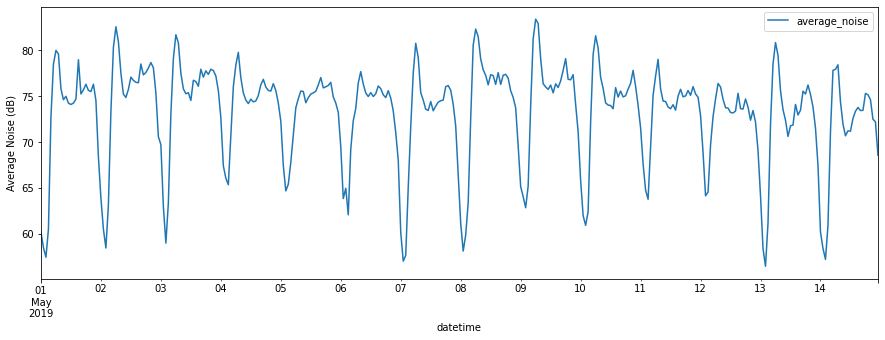

In [ ]:
import matplotlib.pyplot as plt

df3.set_index('datetime',inplace=True)
df3.plot(figsize=(15,5))
plt.ylabel('Average Noise (dB)')
plt.show()

# 3 - Build dataset from `average_noise` data



## 3.1 - Build dataset as a numpy array from column `average_noise` of the Pandas dataframe

In [ ]:
import numpy as np

dataset = df2['average_noise'].values
print(dataset.shape)
dataset = np.reshape(dataset, (-1,1))
print(dataset.shape)

(6569,)
(6569, 1)


## 3.2 - Normalize the data by mapping them in $[0;1]$. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## 3.3 - Split the dataset into training data and testing data, with 90% of the samples for training

In [ ]:
train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print(train.shape)
print(test.shape)

(5912, 1)
(657, 1)


## 3.4 - Use TimeseriesGenerator to build train and test sets to be fed in Keras model

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

lookback = 36
train_data_gen = TimeseriesGenerator(train,train,length=lookback,sampling_rate=1,stride=1,batch_size=10)
print(len(train_data_gen))

test_data_gen = TimeseriesGenerator(test,test,length=lookback,sampling_rate=1,stride=1,batch_size=1)
print(len(test_data_gen))

588
621


# 4 - Studied Machine Learning Models



## 4.1 - Stacked Long Short-Term Memory (Stacked-LSTM)

### 4.1.1 - Building Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(lookback,1),return_sequences=True))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

model.compile(loss='mean_squared_error', optimizer='rmsprop')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 36, 150)           91200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 191,701
Trainable params: 191,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import tensorflow as tf

In [ ]:
# Save best model
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/StackedLSTM.hdf5", monitor='val_loss', verbose=1, save_best_only=True)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history = model.fit(train_data_gen, epochs=100, validation_data=test_data_gen, 
                    callbacks=[checkpointer], verbose=1,shuffle=True)

Epoch 1/100
588/588 [==============================] - 65s 111ms/step - loss: 0.0114 - val_loss: 0.0052

Epoch 00001: val_loss improved from inf to 0.00515, saving model to /content/drive/MyDrive/StackedLSTM.hdf5
Epoch 2/100
588/588 [==============================] - 65s 111ms/step - loss: 0.0057 - val_loss: 0.0025

Epoch 00002: val_loss improved from 0.00515 to 0.00248, saving model to /content/drive/MyDrive/StackedLSTM.hdf5
Epoch 3/100
588/588 [==============================] - 65s 110ms/step - loss: 0.0039 - val_loss: 0.0075

Epoch 00003: val_loss did not improve from 0.00248
Epoch 4/100
588/588 [==============================] - 64s 110ms/step - loss: 0.0032 - val_loss: 0.0024

Epoch 00004: val_loss improved from 0.00248 to 0.00238, saving model to /content/drive/MyDrive/StackedLSTM.hdf5
Epoch 5/100
588/588 [==============================] - 64s 110ms/step - loss: 0.0027 - val_loss: 0.0021

Epoch 00005: val_loss improved from 0.00238 to 0.00206, saving model to /content/drive/MyDri

In [ ]:
# Load the saved model
import keras
model = keras.models.load_model('/content/drive/MyDrive/StackedLSTM.hdf5')

### 4.1.2 - Prediction

In [ ]:
# Predicted train and test values
train_predict = model.predict(train_data_gen)
test_predict = model.predict(test_data_gen)
print("Train and Test predictions shape")
print(train_predict.shape)
print(test_predict.shape)

def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

Y_train = get_y_from_generator(train_data_gen)
Y_test = get_y_from_generator(test_data_gen)
# Mapping back predicted train values
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train)
# Mapping back predicted test values
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test)
print("Expected Train and Test shape")
print(Y_train.shape)
print(Y_test.shape)

Train and Test predictions shape
(5876, 1)
(621, 1)
(5876, 1)
(621, 1)
Expected Train and Test shape
(5876, 1)
(621, 1)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(Y_train[0])
print(train_predict[:,0])
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train, train_predict)))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict)))

[77.08748955]
[75.36233  76.62167  76.54886  ... 68.50878  76.45298  77.933044]
Train Root Mean Squared Error: 0.9746736559970478
Test Root Mean Squared Error: 1.0252127239566327


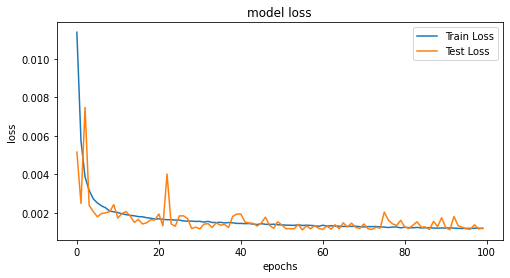

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

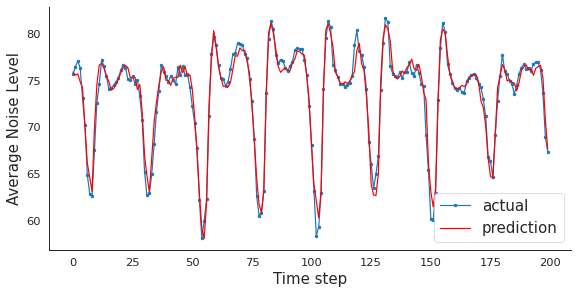

In [ ]:
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

X_data = [x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(X_data, Y_test[:200], marker='.', label="actual")
plt.plot(X_data, test_predict[:200], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Average Noise Level', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

## 4.2 - Combination of Convolutional Neural Network and LSTM (CNN-LSTM)

### 4.2.1 - Building Model

In [ ]:
from keras.layers import Conv1D
from keras.initializers import GlorotUniform

model2 = Sequential()

#Part 1
model2.add(Conv1D(16, padding='same', kernel_size=3, kernel_initializer=GlorotUniform(), input_shape=(lookback,1)))
model2.add(Conv1D(16, padding='same', kernel_size=3, kernel_initializer=GlorotUniform()))
model2.add(Conv1D(16, padding='same', kernel_size=3, kernel_initializer=GlorotUniform()))

# Part 2
model2.add(LSTM(150, activation='relu', input_shape=(lookback,1),return_sequences=True))
model2.add(LSTM(100, activation='relu'))
model2.add(Dense(1, activation='linear'))

model2.summary()

model2.compile(loss='mean_squared_error', optimizer='rmsprop')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 36, 16)            64        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 36, 16)            784       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 36, 16)            784       
_________________________________________________________________
lstm_2 (LSTM)                (None, 36, 150)           100200    
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               100400    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 202,333
Trainable params: 202,333
Non-trainable params: 0
________________________________________________

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath="/content/drive/MyDrive/CNN-LSTM.hdf5", monitor='val_loss', verbose=1, save_best_only=True)
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
history = model2.fit(train_data_gen, epochs=100, validation_data=test_data_gen, 
                    callbacks=[checkpointer], verbose=1,shuffle=True)

Epoch 1/100
588/588 [==============================] - 82s 125ms/step - loss: 0.0392 - val_loss: 0.0063

Epoch 00001: val_loss improved from inf to 0.00627, saving model to /content/drive/MyDrive/CNN-LSTM.hdf5
Epoch 2/100
588/588 [==============================] - 72s 123ms/step - loss: 0.0047 - val_loss: 0.0027

Epoch 00002: val_loss improved from 0.00627 to 0.00266, saving model to /content/drive/MyDrive/CNN-LSTM.hdf5
Epoch 3/100
588/588 [==============================] - 72s 122ms/step - loss: 0.0031 - val_loss: 0.0026

Epoch 00003: val_loss improved from 0.00266 to 0.00264, saving model to /content/drive/MyDrive/CNN-LSTM.hdf5
Epoch 4/100
588/588 [==============================] - 70s 119ms/step - loss: 0.0028 - val_loss: 0.0015

Epoch 00004: val_loss improved from 0.00264 to 0.00152, saving model to /content/drive/MyDrive/CNN-LSTM.hdf5
Epoch 5/100
588/588 [==============================] - 70s 119ms/step - loss: 0.0025 - val_loss: 0.0015

Epoch 00005: val_loss improved from 0.00152

### 4.2.2 - Prediction

In [ ]:
# Predicted train and test values
train_predict = model2.predict(train_data_gen)
test_predict = model2.predict(test_data_gen)
print("Train and Test predictions shape")
print(train_predict.shape)
print(test_predict.shape)

def get_y_from_generator(gen):
    '''
    Get all targets y from a TimeseriesGenerator instance.
    '''
    y = None
    for i in range(len(gen)):
        batch_y = gen[i][1]
        if y is None:
            y = batch_y
        else:
            y = np.append(y, batch_y)
    y = y.reshape((-1,1))
    print(y.shape)
    return y

Y_train = get_y_from_generator(train_data_gen)
Y_test = get_y_from_generator(test_data_gen)
# Mapping back predicted train values
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train)
# Mapping back predicted test values
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test)
print("Expected Train and Test shape")
print(Y_train.shape)
print(Y_test.shape)

Train and Test predictions shape
(5876, 1)
(621, 1)
(5876, 1)
(621, 1)
Expected Train and Test shape
(5876, 1)
(621, 1)


In [ ]:
from sklearn.metrics import mean_squared_error

print(Y_train[0])
print(train_predict[:,0])
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train, train_predict)))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test, test_predict)))

[77.08748955]
[75.514046 76.688    76.64805  ... 70.03394  74.68765  78.58366 ]
Train Root Mean Squared Error: 0.7906947804931828
Test Root Mean Squared Error: 1.0855322019393423


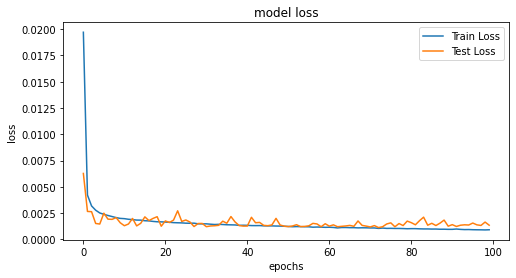

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

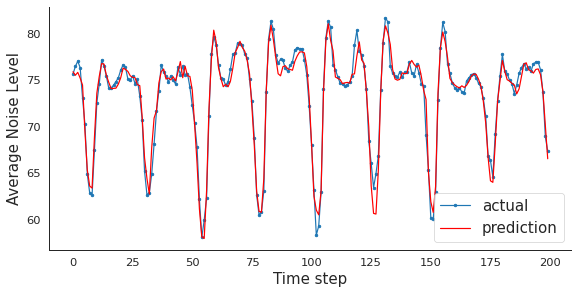

In [ ]:
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

X_data = [x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(X_data, Y_test[:200], marker='.', label="actual")
plt.plot(X_data, test_predict[:200], 'r', label="prediction")
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Average Noise Level', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

# 5 - Detection of False Data Injection Attacks

## 5.1 - Make copy of original dataset


In [ ]:
Y_test_injected = Y_test.copy()

In [ ]:
Y_test_injected.shape

(645, 1)

## 5.2 - Initialize list of Attack Locations

In [ ]:
Attacked = [0]*len(Y_test)
len(Attacked)

645

## 5.3 - Randomly disturb the input data by adding / subtracting values to some of the original average noise level values

In [ ]:
for i in range(30):
  position = randint(0,645)
  if (i%2==0):
    Y_test_injected[position] += randint(10,15)
  else:
    Y_test_injected[position] -= randint(10,15)
  Attacked[position] = 1

## 5.4 - Plot Original Data, Injected Data, and Attack Locations

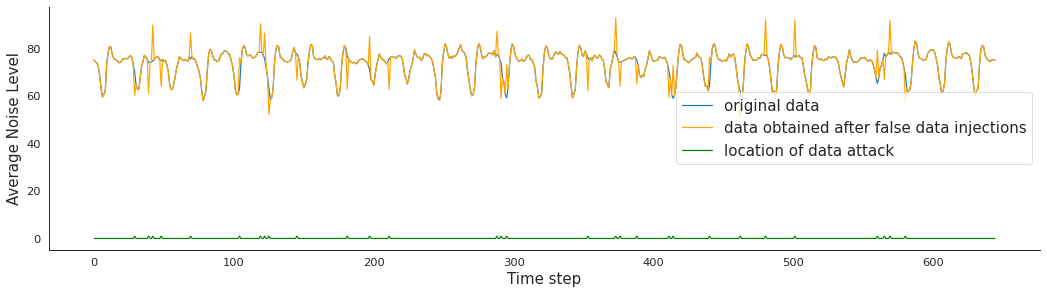

In [ ]:
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

X_data = [x for x in range(len(Y_test))]
plt.figure(figsize=(15,4))
plt.plot(X_data, Y_test[:], label="original data")
plt.plot(X_data, Y_test_injected[:], color='orange', label="data obtained after false data injections")
plt.plot(X_data, Attacked[:], color='green', label='location of data attack')
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Average Noise Level', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

## 5.5 - Initialize list of Anomalies Locations

In [ ]:
Anomalies = [0]*len(Y_test)
len(Anomalies)

645

## 5.6 - Find Anomalies Using Threshold of 5dB

In [ ]:
for i in range(len(Y_test)):
  # if valu
  if (abs(Y_test_injected[i] - test_predict[i]) > 5):
    Anomalies[i] = 1

## 5.7 - Plot Injected Data, Predicted Data, and Anomaly Locations Detected

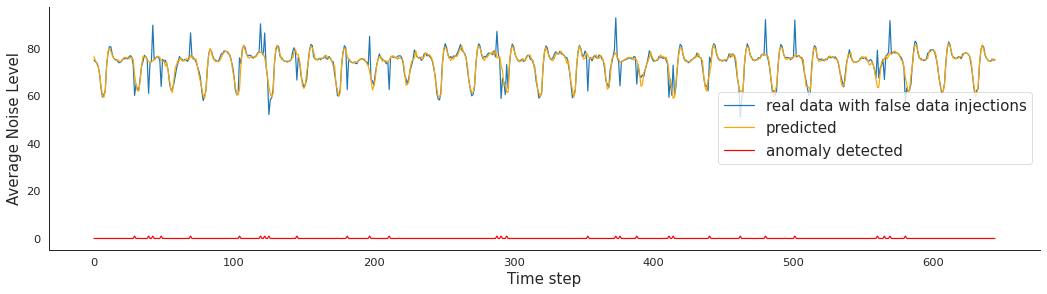

In [ ]:
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

X_data = [x for x in range(len(Y_test))]
plt.figure(figsize=(15,4))
plt.plot(X_data, Y_test_injected[:], label="real data with false data injections")
plt.plot(X_data, test_predict[:], color='orange', label="predicted")
plt.plot(X_data, Anomalies[:], color='red', label='anomaly detected')
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Average Noise Level', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();